## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


# Business Understanding



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
%matplotlib inline
df = pd.read_csv('Data/data-clean.csv')
df.drop('Unnamed: 0',axis=1,inplace=True)

#doing this here and not during data cleaning because this split doesnt survive being saved as .csv
df['genres'] = df['genres'].map(lambda x: x.split(","))
df['director'] = df['director'].map(lambda x: x.split(","))
display(df.head(2)),(display(df.info()),display(df.isna().sum()))

,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,profit,genres,director
0,2011-05-20,Pirates of the Caribbean: On Stranger Tides 2011,410600000,241063875,1045663875,804600000,635063875,"[Action, Adventure, Fantasy]",[Rob Marshall]
1,2019-06-07,Dark Phoenix 2019,350000000,42762350,149762350,107000000,-200237650,"[Action, Adventure, Sci-Fi]",[Simon Kinberg]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1537 entries, 0 to 1536
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       1537 non-null   object
 1   movie              1537 non-null   object
 2   production_budget  1537 non-null   int64 
 3   domestic_gross     1537 non-null   int64 
 4   worldwide_gross    1537 non-null   int64 
 5   foreign_gross      1537 non-null   int64 
 6   profit             1537 non-null   int64 
 7   genres             1537 non-null   object
 8   director           1537 non-null   object
dtypes: int64(5), object(4)
memory usage: 108.2+ KB


None

release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
foreign_gross        0
profit               0
genres               0
director             0
dtype: int64

(None, (None, None))

# Question 3:
### Does the average ROI by genre follow a similar trend when compared between domestic and foreign markets?


In [3]:
#drop dupes
df = df.drop_duplicates(subset='movie', keep='first')
df.shape

(1483, 9)

In [14]:
# creating Q3 dataframe
# ADD COLUMNS 'DOMESTIC ROI', 'FOREIGN ROI', 'WORLDWIDE ROI'
# note: might not need to add these columns if Samantha already did it

Q3_df = df

Q3_df['ROI_domestic'] = ((Q3_df['domestic_gross'] - Q3_df['production_budget']) / Q3_df['production_budget']) * 100
                               
Q3_df['ROI_foreign'] = ((Q3_df['foreign_gross'] - Q3_df['production_budget']) / Q3_df['production_budget']) * 100
                              
Q3_df['ROI_worldwide'] = ((Q3_df['worldwide_gross'] - Q3_df['production_budget']) / Q3_df['production_budget']) * 100

Q3_df['year'] = pd.DatetimeIndex(Q3_df['release_date']).year

Q3_df = Q3_df.loc[(Q3_df['year'] > 2010)]

Q3_df.shape

(1311, 13)

In [15]:
#separate each genre of a movie into their own row
exploded_df = Q3_df.explode('genres')
exploded_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,profit,genres,director,ROI_domestic,ROI_foreign,ROI_worldwide,year
0,2011-05-20,Pirates of the Caribbean: On Stranger Tides 2011,410600000,241063875,1045663875,804600000,635063875,Action,[Rob Marshall],-41.289850,95.957136,154.667286,2011
0,2011-05-20,Pirates of the Caribbean: On Stranger Tides 2011,410600000,241063875,1045663875,804600000,635063875,Adventure,[Rob Marshall],-41.289850,95.957136,154.667286,2011
0,2011-05-20,Pirates of the Caribbean: On Stranger Tides 2011,410600000,241063875,1045663875,804600000,635063875,Fantasy,[Rob Marshall],-41.289850,95.957136,154.667286,2011
1,2019-06-07,Dark Phoenix 2019,350000000,42762350,149762350,107000000,-200237650,Action,[Simon Kinberg],-87.782186,-69.428571,-57.210757,2019
1,2019-06-07,Dark Phoenix 2019,350000000,42762350,149762350,107000000,-200237650,Adventure,[Simon Kinberg],-87.782186,-69.428571,-57.210757,2019


In [31]:
exploded_df['genres'].value_counts()

Drama          635
Comedy         439
Action         402
Adventure      318
Thriller       234
Crime          208
Horror         163
Romance        146
Sci-Fi         123
Biography      123
Mystery        115
Fantasy        105
Animation       94
Family          72
Music           41
History         40
Documentary     31
Sport           30
War             15
Western          9
Musical          6
Name: genres, dtype: int64

In [16]:
# determine top 5 genres (ROI-worldwide) by creating a new dataframe
top5_Q3_df = exploded_df[['genres', 'ROI_domestic', 'ROI_foreign','ROI_worldwide']].copy()
top5_Q3_df.head()

,genres,ROI_domestic,ROI_foreign,ROI_worldwide
0,Action,-41.289850,95.957136,154.667286
0,Adventure,-41.289850,95.957136,154.667286
0,Fantasy,-41.289850,95.957136,154.667286
1,Action,-87.782186,-69.428571,-57.210757
1,Adventure,-87.782186,-69.428571,-57.210757


In [17]:
# group dataframe by genres and calculate median
grouped_by_genres = top5_Q3_df.groupby('genres').median()
grouped_by_genres

,ROI_domestic,ROI_foreign,ROI_worldwide
genres,,,
Action,-27.232784,16.524675,112.972852
Adventure,-8.951864,53.815108,162.363957
Animation,5.784405,83.082221,198.188978
Biography,1.899783,-32.746550,90.366885
Comedy,11.473743,-11.529117,144.709156
Crime,-18.558897,-32.529146,64.463095
Documentary,-91.717067,-99.909600,-47.225922
Drama,-15.519800,-35.324480,79.907329
Family,3.984882,-17.274336,105.511361


In [18]:
#get top genres sorted by WORLDWIDE ROI
roi_genres = grouped_by_genres.sort_values(by=['ROI_worldwide'], ascending = False)
roi_genres.head(10)

,ROI_domestic,ROI_foreign,ROI_worldwide
genres,,,
Mystery,56.965319,55.904993,227.818077
Animation,5.784405,83.082221,198.188978
Musical,-49.429681,42.465095,173.752303
Sci-Fi,-8.206552,69.339398,168.386218
Adventure,-8.951864,53.815108,162.363957
Comedy,11.473743,-11.529117,144.709156
Horror,-18.290033,10.571580,139.973975
Romance,10.848518,-19.633567,133.868173
Music,20.438264,-38.546933,128.700183


In [24]:
#isolate top 5 genres (ROI Worldwide) from original dataframe
# am I calculating my ROI world wide wrong? SAMANTHA DIFF: HER COMEDY VS MY THRILLER

mystery_df = exploded_df.loc[(exploded_df['genres'] == 'Mystery')]

animation_df = exploded_df.loc[(exploded_df['genres'] == 'Animation')]

musical_df = exploded_df.loc[(exploded_df['genres'] == 'Musical')]

scifi_df = exploded_df.loc[(exploded_df['genres'] == 'Sci-Fi')]

adventure_df = exploded_df.loc[(exploded_df['genres'] == 'Adventure')]



In [25]:
#group by year
mys2 = mystery_df.groupby('year').median()

ani2 = animation_df.groupby('year').median()

mus2 = musical_df.groupby('year').median()

scifi2 = scifi_df.groupby('year').median()

adv2 = adventure_df.groupby('year').median()

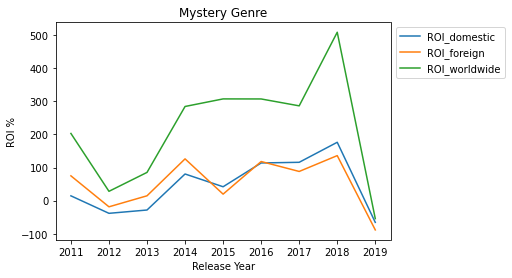

In [39]:
# plot the dataframes
mys2.loc[:,['ROI_domestic', 'ROI_foreign', 'ROI_worldwide']].plot();
plt.xlabel('Release Year')
plt.ylabel('ROI %')
plt.title('Mystery Genre')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1);


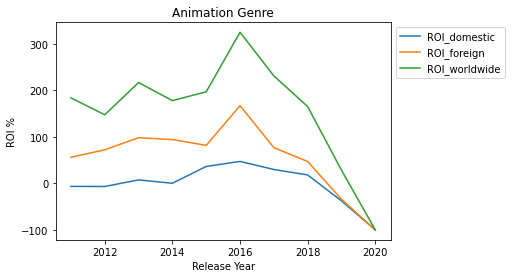

In [27]:
ani2.loc[:,['ROI_domestic', 'ROI_foreign', 'ROI_worldwide']].plot();
plt.xlabel('Release Year')
plt.ylabel('ROI %')
plt.title('Animation Genre')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1);

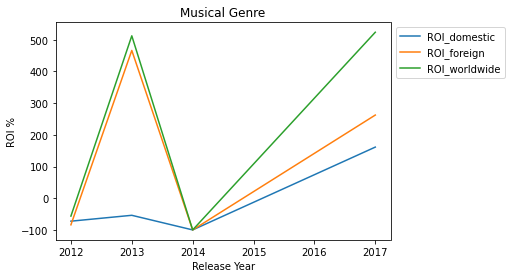

In [28]:
mus2.loc[:,['ROI_domestic', 'ROI_foreign', 'ROI_worldwide']].plot();
plt.xlabel('Release Year')
plt.ylabel('ROI %')
plt.title('Musical Genre')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1);

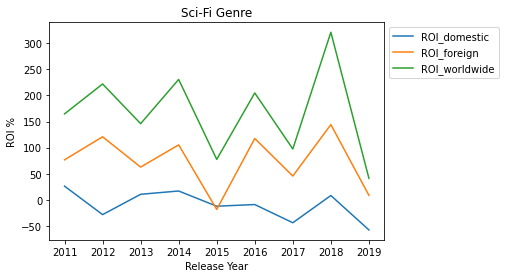

In [29]:
scifi2.loc[:,['ROI_domestic', 'ROI_foreign', 'ROI_worldwide']].plot();
plt.xlabel('Release Year')
plt.ylabel('ROI %')
plt.title('Sci-Fi Genre')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1);

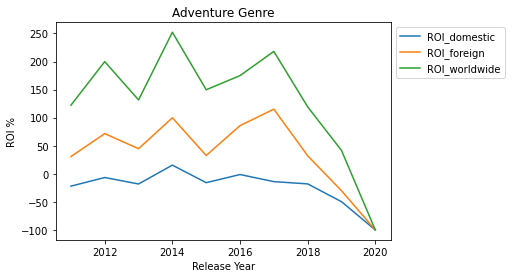

In [30]:
adv2.loc[:,['ROI_domestic', 'ROI_foreign', 'ROI_worldwide']].plot();
plt.xlabel('Release Year')
plt.ylabel('ROI %')
plt.title('Adventure Genre')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1);

In [32]:
Q3_df.corr()

,production_budget,domestic_gross,worldwide_gross,foreign_gross,profit,ROI_domestic,ROI_foreign,ROI_worldwide,year
production_budget,1.000000,0.706527,0.782756,0.787983,0.658975,-0.068990,0.010233,-0.032940,0.064765
domestic_gross,0.706527,1.000000,0.944385,0.871115,0.938577,0.073026,0.134707,0.103351,0.077839
worldwide_gross,0.782756,0.944385,1.000000,0.984155,0.983910,0.034006,0.147612,0.088069,0.078569
foreign_gross,0.787983,0.871115,0.984155,1.000000,0.963259,0.011407,0.147805,0.075793,0.075362
profit,0.658975,0.938577,0.983910,0.963259,1.000000,0.060906,0.175471,0.115900,0.076368
ROI_domestic,-0.068990,0.073026,0.034006,0.011407,0.060906,1.000000,0.930225,0.984977,0.021865
ROI_foreign,0.010233,0.134707,0.147612,0.147805,0.175471,0.930225,1.000000,0.979624,0.026419
ROI_worldwide,-0.032940,0.103351,0.088069,0.075793,0.115900,0.984977,0.979624,1.000000,0.024398
year,0.064765,0.077839,0.078569,0.075362,0.076368,0.021865,0.026419,0.024398,1.000000


# Question 3 Conclusion
### Does the average ROI by genre follow a similar trend when compared between domestic and foreign markets?

#### The average ROI for the top 5 genres over the past decade shows that there is a bigger return on investment in the foreign market vs the domestic market for Adventure, Sci-Fi, Animation, and potentially Musical movies. The Mystery Genre's domestic and foreign ROI follow the same general positive trend over time.

#### Each genre's domestic ROI hovers around 0% except for Mystery movies that generally maintains a postive trajectory. There are a few outliers in the musical and mystery genre, but the foreign ROI generally performs better than the domestic ROI. 

#### Based on this section of the analysis, Microsoft's movie studios should focus on producing Adventure, Sci-Fi, and Animation movies because of their greater foreign ROI potential.

